In [23]:
data_type = 'red_data' # reduced data

In [24]:
import sys
sys.path.insert(0, '..')
from definition import (
    data_names,
    limits_m_Kpipi,
    columns,
    column_ranges
)

MC_name   = data_names['MC']
data_name = data_names[data_type]

low_m_Kpipi = limits_m_Kpipi[data_type]['low']
high_m_Kpipi = limits_m_Kpipi[data_type]['high']

print("MC name: ", MC_name)
print("data name: ", data_name)
print('----')
print('m_Kpipi')
print("low: ", low_m_Kpipi)
print("high: ", high_m_Kpipi)

MC name:  BTODstDX_MC
data name:  BTODstDX_reduced
----
m_Kpipi
low:  1820
high:  1950


The columns that need to be looked at are:
- $q^2$: `q2_reco`
- *isolation BDT*: `isolation_bdt`
- $m(D^*K\pi\pi)$: `m_DstKpipi`
- The angles 
    - $cos(\theta_X)$ ($=\theta_D$ in the paper): `costheta_X_reco`
    - $cos(\theta_L)$: `costheta_L_reco`
    - $\chi$: `chi_reco`

We'll also look at :
- $t_\tau$: `tau_life_reco`

# MC sample of $B \to D^{*-}\left(D^{+} \to K^+ \pi^+ \pi^+  \right)X$ Background

**INPUTS**
- `MC`: $D^+ \to K^+ \pi^+ \pi^-$
- `data`: LHCb data, with $_s$Weights to project in the $D^+ \to K^+ \pi^+ \pi^-$ contribution and project out the other contributions.

**GOALS**
- Compare `MC` and `_s`Weighted data
- Reweight the `MC` to align it with the $_s$Weighted data. Eventually, learn to do it in order to apply the reweighting to the general `MC`.

In [25]:
# python libraries
import zfit
import timeit

# bd2dsttaunu
from bd2dsttaunu.locations import loc

# HEA library
from HEA.plot import plot_hist_auto, plot_hist, save_fig, plot_divide_auto
from HEA import load_dataframe
from HEA.plot.tools import draw_vline
from HEA.definition import latex_params
from HEA.pandas_root import load_saved_root

Welcome to JupyROOT 6.22/06


## Read the dataframe

In [1]:
df = {}
df['MC'] = load_dataframe(loc.B2DstDplusX_MC, tree_name='DecayTreeTuple/DecayTree', columns=columns+['m_Kpipi'])
df['data'] = load_saved_root(data_name + '_with_sWeights', folder_name=data_name)

NameError: name 'load_dataframe' is not defined

In [27]:
df['MC'] = df['MC'].query(f'm_Kpipi > {low_m_Kpipi} and m_Kpipi < {high_m_Kpipi}')
# df['data'] = df['data'].query(f'm_Kpipi > {low_m_Kpipi} and m_Kpipi < {high_m_Kpipi}')

## Plot

In [28]:
column_ranges = {
    'q2_reco': [1.2, None],
    'isolation_bdt': [None, 0.95],
    'tau_life_reco': [None, 0.003],
    'B0_M': [3150, None],
    'm_DstKpipi': [None, 5450],
}

Figure saved in /home/correiaa/bd2dsttaunu/output/plots//BTODstDX_MC_vs_BTODstDX_reduced/q2_reco
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//BTODstDX_MC_vs_BTODstDX_reduced/isolation_bdt
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//BTODstDX_MC_vs_BTODstDX_reduced/tau_life_reco


//home/correiaa/bd2dsttaunu/HEA/HEA/plot/histogram.py:84: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


Figure saved in /home/correiaa/bd2dsttaunu/output/plots//BTODstDX_MC_vs_BTODstDX_reduced/m_DstKpipi
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//BTODstDX_MC_vs_BTODstDX_reduced/theta_X_reco


/home/correiaa/miniconda/envs/bd2dsttaunu_env/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/correiaa/miniconda/envs/bd2dsttaunu_env/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/correiaa/miniconda/envs/bd2dsttaunu_env/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/correiaa/miniconda/envs/bd2dsttaunu_env/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Figure saved in /home/correiaa/bd2dsttaunu/output/plots//BTODstDX_MC_vs_BTODstDX_reduced/theta_L_reco
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//BTODstDX_MC_vs_BTODstDX_reduced/chi_reco
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//BTODstDX_MC_vs_BTODstDX_reduced/costheta_X_reco


/home/correiaa/miniconda/envs/bd2dsttaunu_env/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/correiaa/miniconda/envs/bd2dsttaunu_env/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/correiaa/miniconda/envs/bd2dsttaunu_env/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/correiaa/miniconda/envs/bd2dsttaunu_env/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Figure saved in /home/correiaa/bd2dsttaunu/output/plots//BTODstDX_MC_vs_BTODstDX_reduced/costheta_L_reco
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//BTODstDX_MC_vs_BTODstDX_reduced/coschi_reco


//home/correiaa/bd2dsttaunu/HEA/HEA/plot/histogram.py:84: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


Figure saved in /home/correiaa/bd2dsttaunu/output/plots//BTODstDX_MC_vs_BTODstDX_reduced/tau_M
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//BTODstDX_MC_vs_BTODstDX_reduced/B0_M


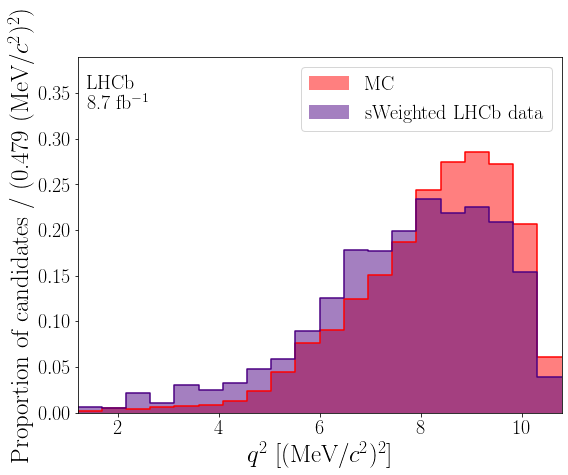

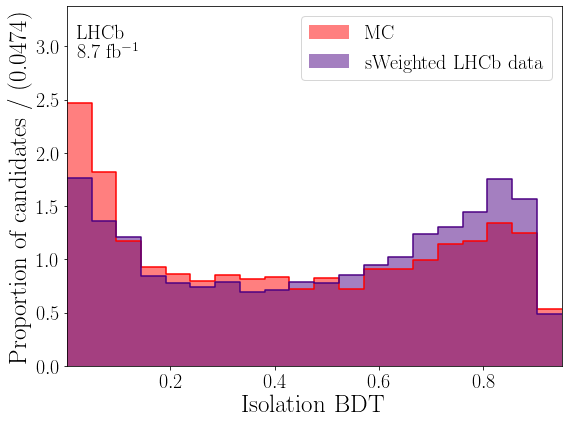

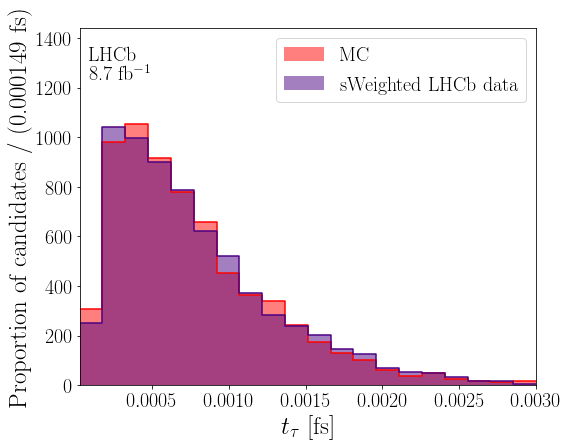

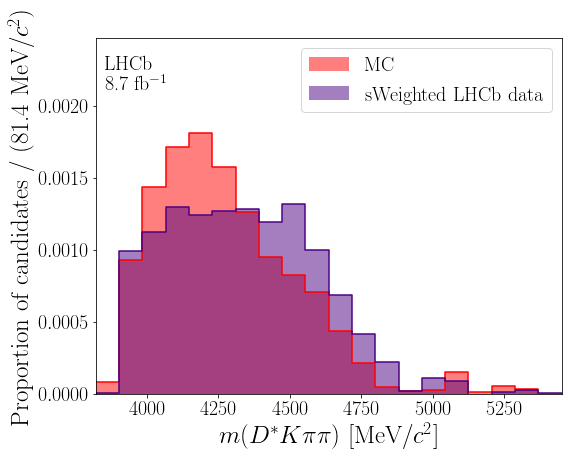

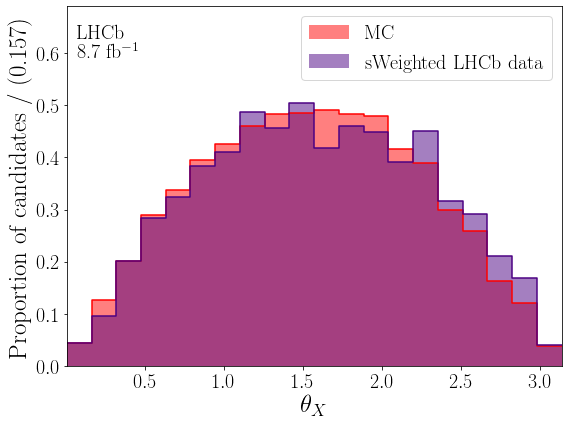

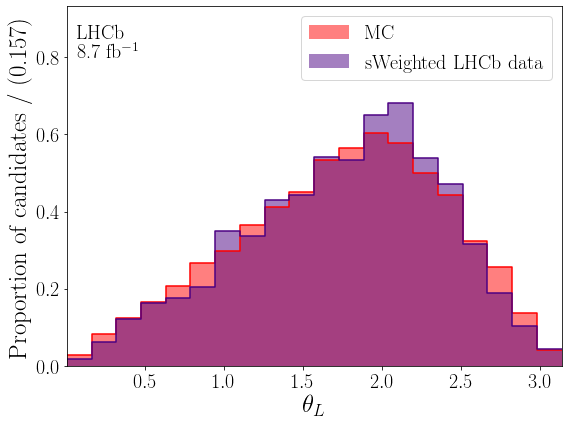

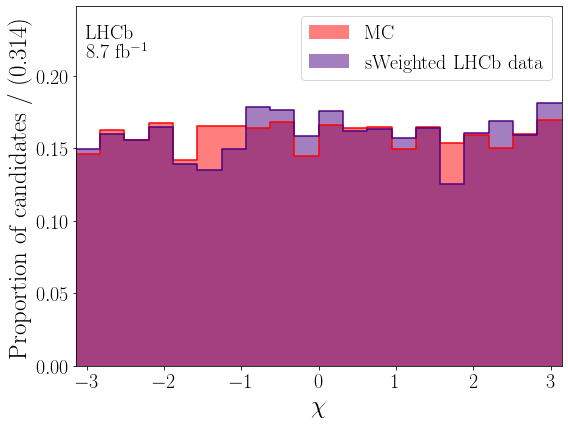

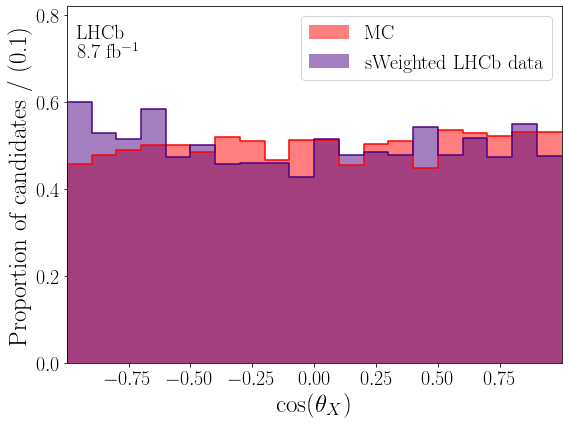

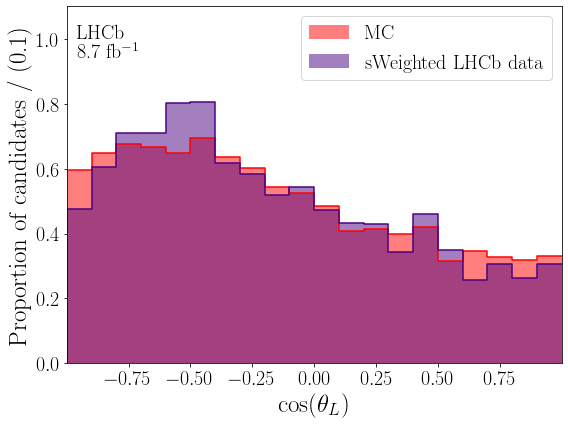

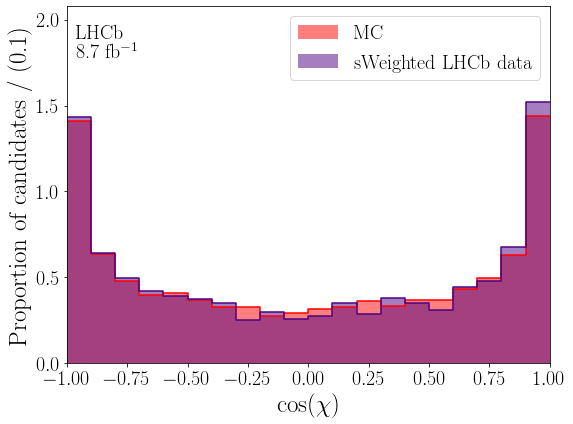

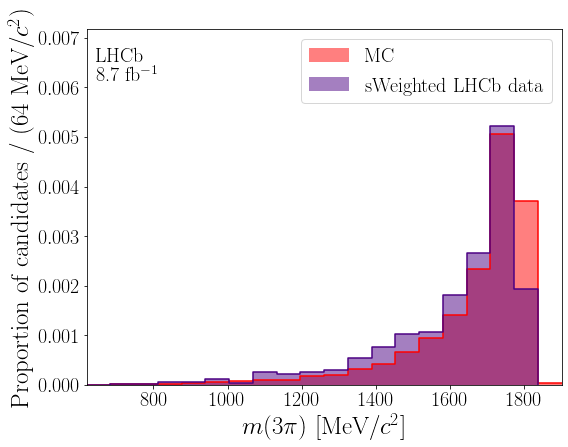

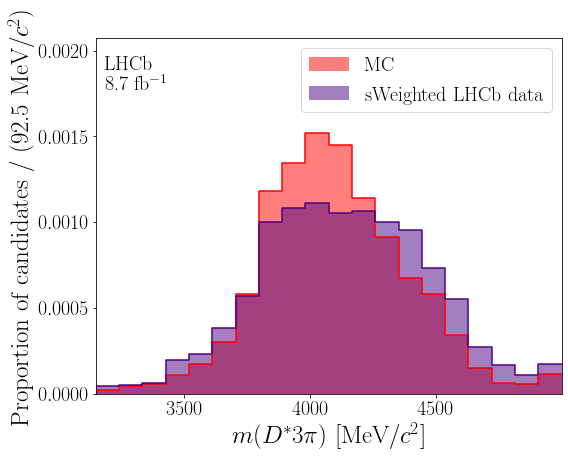

In [31]:
for column in columns:
    if column != 'm_Kpipi':
        if column in column_ranges:
            low, high = column_ranges[column]
        else:
            low = None
            high = None

        fig, ax = plot_hist_auto({'MC': df['MC'], 'sWeighted LHCb data':df['data']}, column, fig_name=column,
                                 folder_name=f'{MC_name}_vs_{data_name}', bar_mode=True, 
                                 low=low, high=high, n_bins=20,
                                 colors=['r', 'indigo'], weights=[None, df['data']['sWeight']],
                                 pos_text_LHC={'ha': 'left', 'fontsize':20})

Figure saved in /home/correiaa/bd2dsttaunu/output/plots//BTODstDX_MC_d_BTODstDX_reduced/q2_reco
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//BTODstDX_MC_d_BTODstDX_reduced/isolation_bdt
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//BTODstDX_MC_d_BTODstDX_reduced/tau_life_reco


//home/correiaa/bd2dsttaunu/HEA/HEA/plot/histogram.py:647: RuntimeWarning: invalid value encountered in sqrt
  err2 = np.sqrt(counts2)
//home/correiaa/bd2dsttaunu/HEA/HEA/plot/histogram.py:652: RuntimeWarning: invalid value encountered in true_divide
  err = division * np.sqrt((err1 / counts1)**2 + (err2 / counts2)**2)


Figure saved in /home/correiaa/bd2dsttaunu/output/plots//BTODstDX_MC_d_BTODstDX_reduced/m_DstKpipi
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//BTODstDX_MC_d_BTODstDX_reduced/theta_X_reco


/home/correiaa/miniconda/envs/bd2dsttaunu_env/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/correiaa/miniconda/envs/bd2dsttaunu_env/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Figure saved in /home/correiaa/bd2dsttaunu/output/plots//BTODstDX_MC_d_BTODstDX_reduced/theta_L_reco
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//BTODstDX_MC_d_BTODstDX_reduced/chi_reco
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//BTODstDX_MC_d_BTODstDX_reduced/costheta_X_reco
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//BTODstDX_MC_d_BTODstDX_reduced/costheta_L_reco
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//BTODstDX_MC_d_BTODstDX_reduced/coschi_reco
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//BTODstDX_MC_d_BTODstDX_reduced/tau_M
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//BTODstDX_MC_d_BTODstDX_reduced/B0_M


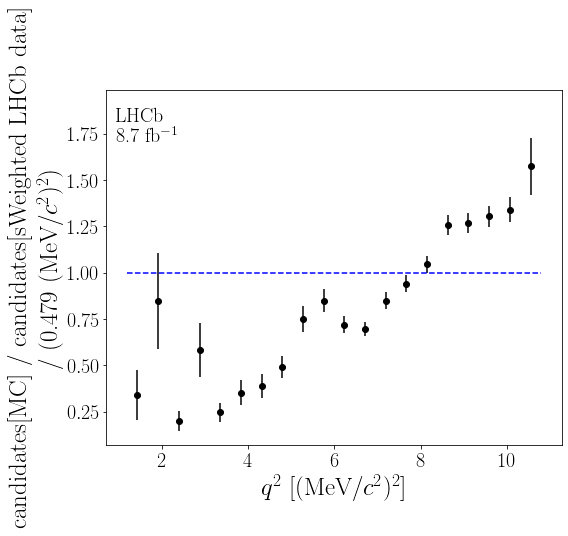

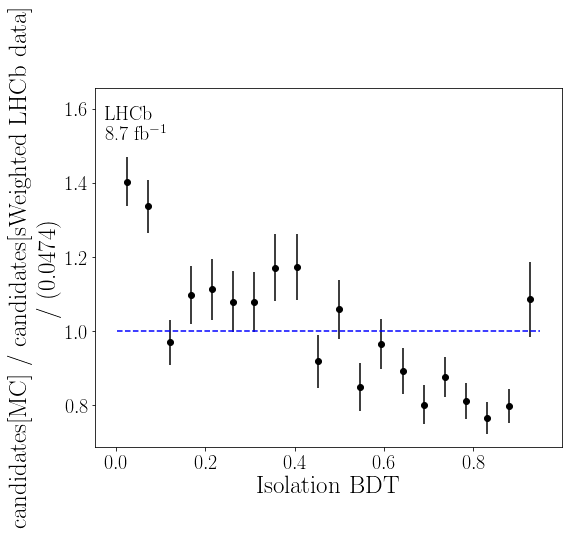

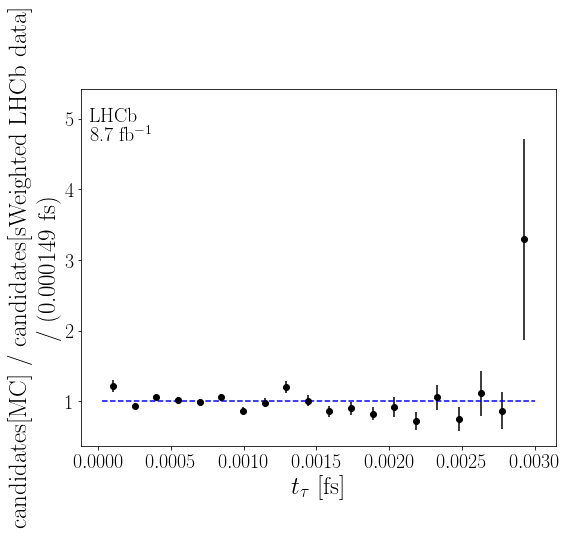

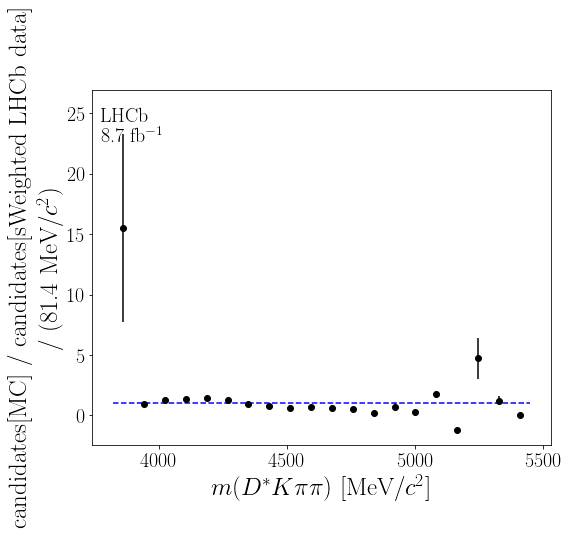

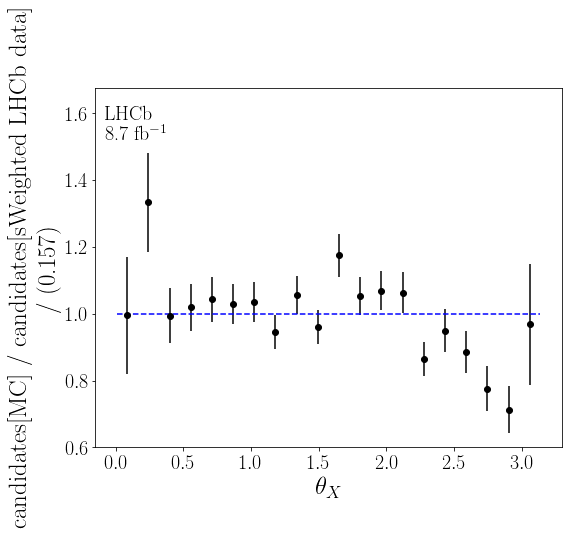

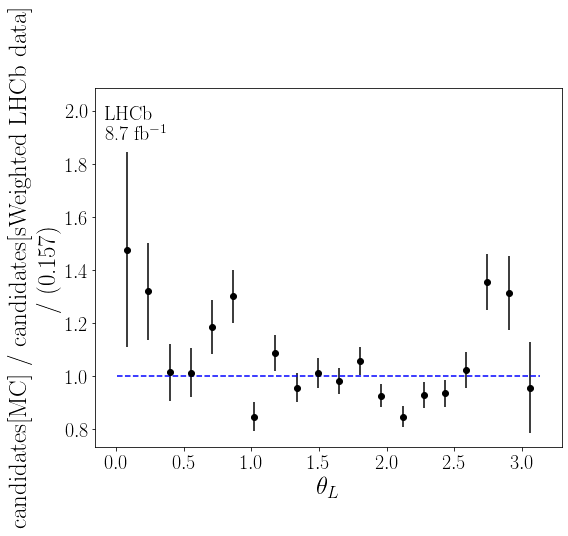

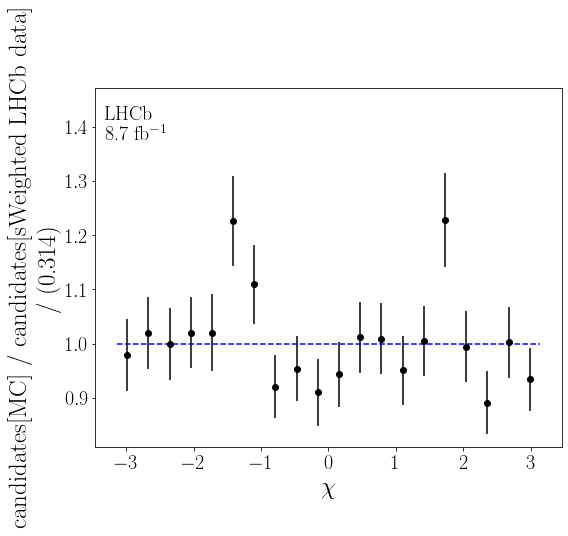

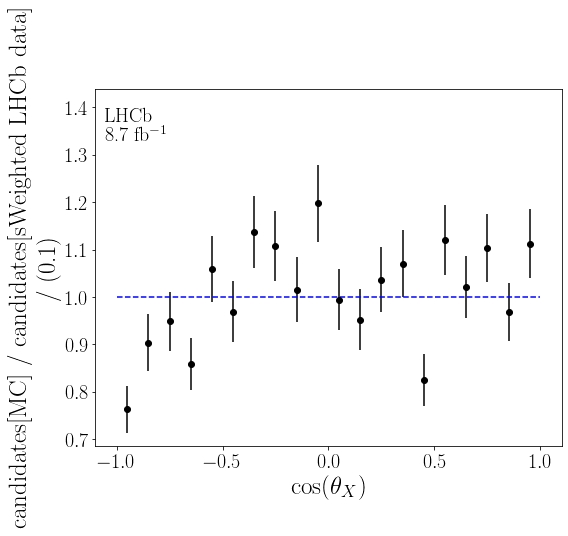

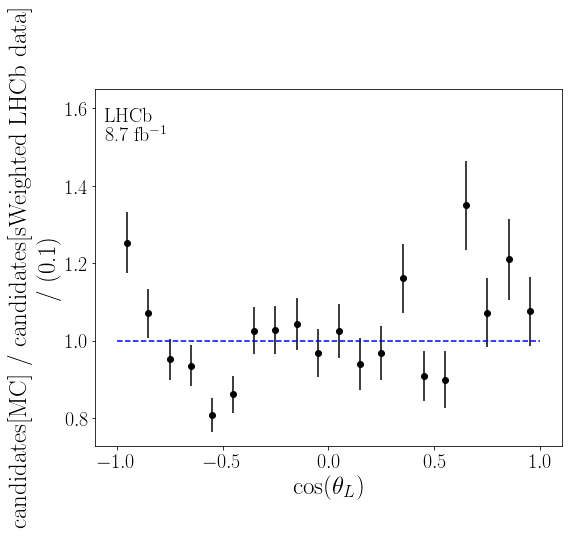

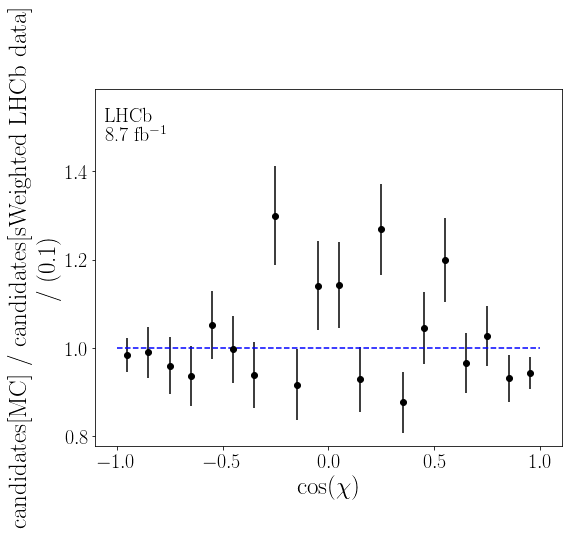

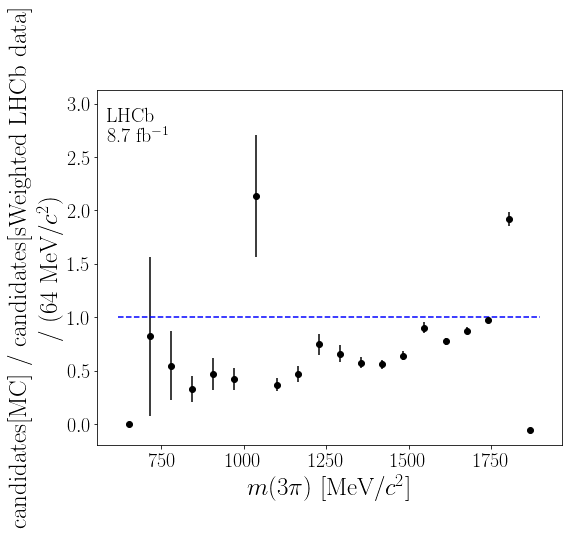

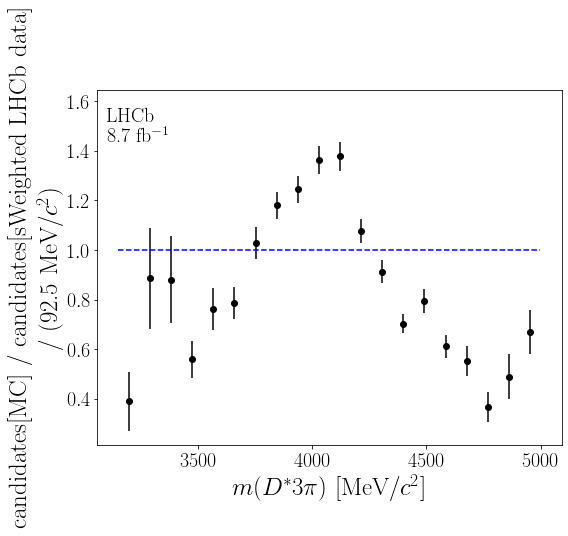

In [30]:
for column in columns:
    if column != 'm_Kpipi':
        if column in column_ranges:
            low, high = column_ranges[column]
        else:
            low = None
            high = None

        fig, ax = plot_divide_auto({'MC': df['MC'], 'sWeighted LHCb data':df['data']}, column, fig_name=column,
                                   folder_name=f'{MC_name}_d_{data_name}',
                                   low=low, high=high, n_bins=20,
                                   weights=[None, df['data']['sWeight']],
                                   pos_text_LHC={'ha': 'left', 'fontsize':20})